# TASK 1 Load the data and libraries

In [1]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
plt.rcParams['figure.figsize'] = (12,8)

In [3]:
data = pd.read_csv('bike_sharing_data.txt')
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Population  97 non-null     float64
 1   Profit      97 non-null     float64
dtypes: float64(2)
memory usage: 1.6 KB


In [5]:
data['Population']

0      6.1101
1      5.5277
2      8.5186
3      7.0032
4      5.8598
       ...   
92     5.8707
93     5.3054
94     8.2934
95    13.3940
96     5.4369
Name: Population, Length: 97, dtype: float64

In [6]:
data['Profit']

0     17.59200
1      9.13020
2     13.66200
3     11.85400
4      6.82330
        ...   
92     7.20290
93     1.98690
94     0.14454
95     9.05510
96     0.61705
Name: Profit, Length: 97, dtype: float64

# TASK 2 Visualize the data 

Text(0.5, 1.0, "Profit in 10000$ and city 's Population in 10000s ")

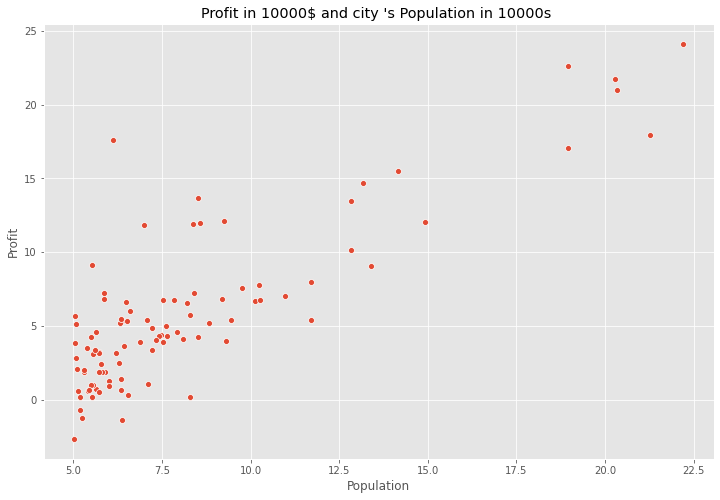

In [135]:
ax = sns.scatterplot(x = 'Population', y = 'Profit', data = data)
ax.set_title("Profit in 10000$ and city 's Population in 10000s ")


# TASK 3  Compute the cost J of theta 

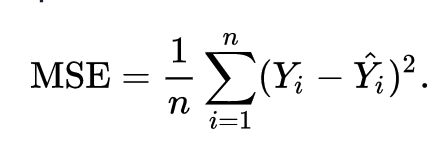

In [8]:
def cost_function(X, y ,theta):
    m = len (y)
    h = X.dot(theta)
    error = (h-y)**2
    return 1 / (2*m) * np.sum(error)
    

In [9]:
m = data.Population.size
X = np.concatenate([np.ones((m,1)),  data.Population.values.reshape(m,1)], axis = 1) 
y = data.Profit.values.reshape(m,1) 
theta = np.zeros((2,1))

In [15]:
X[1:10] 

array([[1.    , 5.5277],
       [1.    , 8.5186],
       [1.    , 7.0032],
       [1.    , 5.8598],
       [1.    , 8.3829],
       [1.    , 7.4764],
       [1.    , 8.5781],
       [1.    , 6.4862],
       [1.    , 5.0546]])

In [16]:
y[1:10]

array([[ 9.1302],
       [13.662 ],
       [11.854 ],
       [ 6.8233],
       [11.886 ],
       [ 4.3483],
       [12.    ],
       [ 6.5987],
       [ 3.8166]])

In [17]:
cost_function(X,y,theta)

32.072733877455676

# TASK 4 Gradient descent 

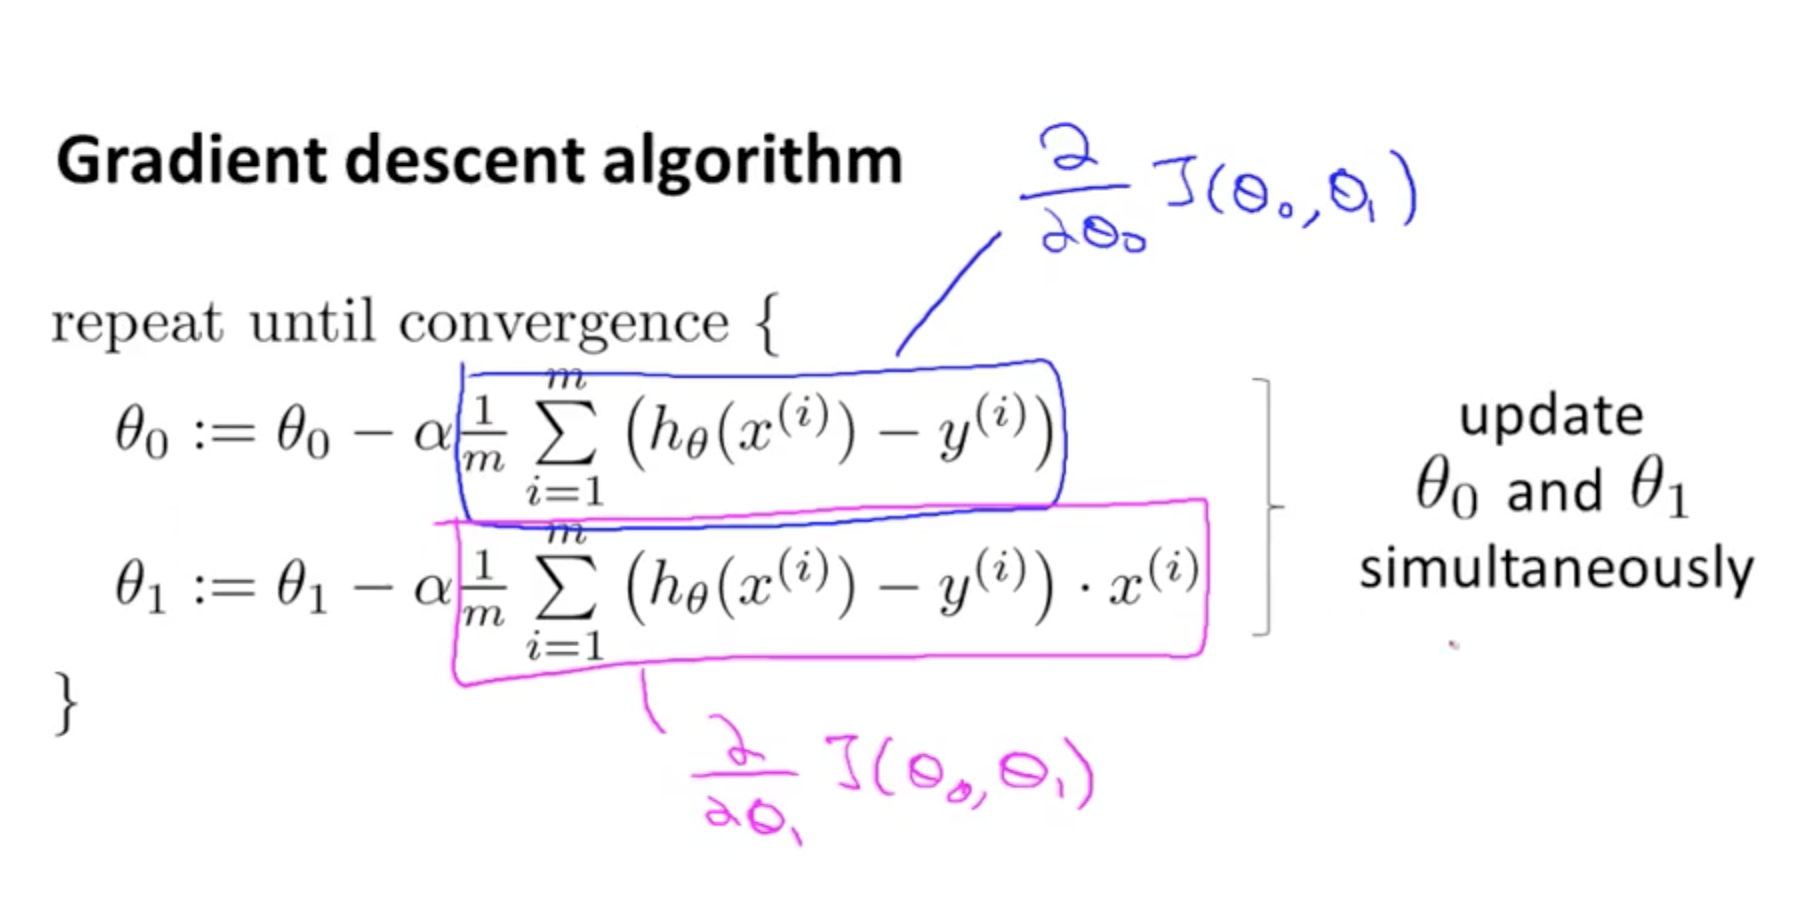

In [37]:
def gradient_descent(X,y,alpha,iterations,theta):
    m=len(y)
    costs = []
    for i in range(iterations):
        y_pred = X.dot(theta) 
        error = np.dot(X.transpose(), (y_pred - y ))
        theta += -(alpha/m)* error
        costs.append(cost_function(X,y,theta))
    return theta,costs   
  

In [38]:
[theta, costs] = gradient_descent(X,y,0.01,2000,theta) 

In [39]:
print("function hypothesis is : h(theta) =  {} + {}x1 ".format( round(theta[0,0],2) , round(theta[1,0],2)  ))

function hypothesis is : h(theta) =  -3.9 + 1.19x1 


 # TASK 5 Visualising the Cost functions 
 
 - The purpose of this graph is to show you how J(𝜃) varies with changes in 𝜃_0 and 𝜃_1.
 - We can see that the cost function J(𝜃) is bowl-shaped and has a global minimum.

In [40]:
from mpl_toolkits.mplot3d import Axes3D

In [45]:
theta_0 = np.linspace(-10,10,100)
theta_1 = np.linspace(-1,4,100)

cost_values = np.zeros((len(theta_0), len(theta_1)) )

for i in range(len(theta_0)):
    for j in range(len(theta_1)):
        arr = np.array([ theta_0[i], theta_1[j]] )
        cost_values[i,j] = cost_function(X,y,arr)


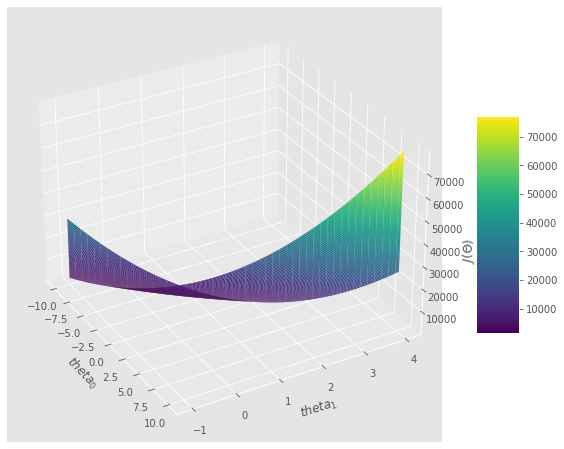

In [46]:
fig = plt.figure(figsize = (12,8))
ax = fig.gca(projection = '3d')

surf = ax.plot_surface(theta_0,theta_1, cost_values, cmap= "viridis" )
fig.colorbar(surf, shrink = 0.5, aspect =5) 

plt.xlabel("$theta_0$")
plt.ylabel("$theta_1$")
ax.set_zlabel("$J(\Theta)$")
ax.view_init(30,330)

plt.show()






# TASK 6 Plotting the convergence
- Let’s plot how the cost function varies with the number of iterations.
- When we ran gradient descent previously, it returns the history of J(𝜃) values in a vector “costs”.
- We will now plot the J values against the number of iterations.

Text(0.5, 1.0, 'Values of the cost function over iterations')

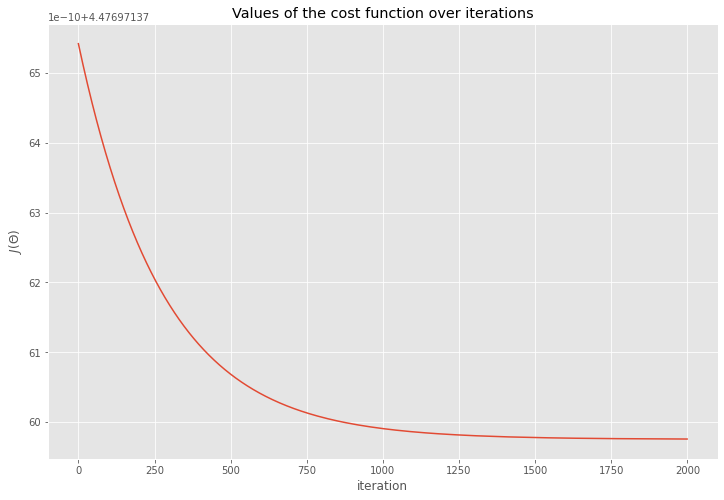

In [47]:
plt.plot(costs)
plt.xlabel("iteration")
plt.ylabel("$J(\Theta)$")
plt.title("Values of the cost function over iterations")


# Task 8: Training Data with Univariate Linear Regression Fit

- Now that we have correctly implemented and run gradient descent and arrived at the final parameters of our model, we can use these parameters to plot the linear fit. 

In [50]:
theta = np.squeeze(theta) 

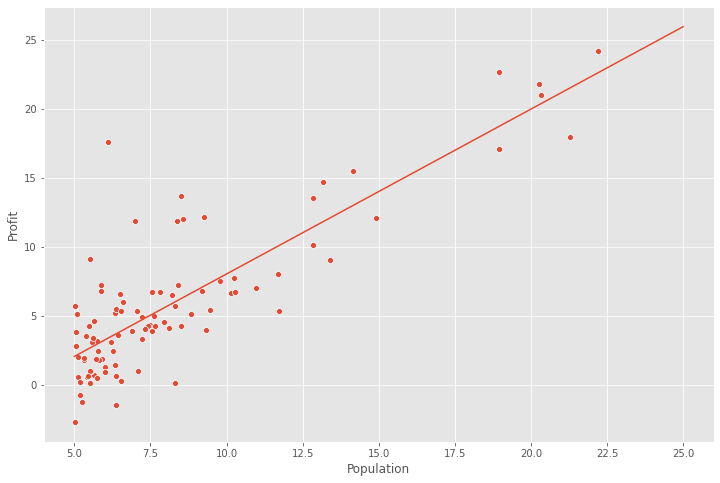

In [51]:
sns.scatterplot(x = 'Population', y = 'Profit', data = data)
x_values = np.linspace(5,25,100)
y_values = theta[0] + theta[1]*x_values
sns.lineplot(x_values, y_values)
plt.xlabel = "Population in 10000s"
plt.ylabel = "profit in 10000$"
plt.title = "Linear regression fit"


# Task 9: Inference using the optimized 𝜃 values
 - In this final task, let’s use our final values for 𝜃 to make predictions on profits in cities of 35,000 and 70,000 people. 

In [52]:
def predict(theta,x):
    y_pred = np.dot(theta.transpose(),x)
    return y_pred



In [53]:
pred1 = predict(theta,np.array([1,3.5])) * 10000
pred2 = predict(theta,np.array([1,4])) * 10000


In [54]:
print("the model predict the profit in cities of 35,000 people is {} $".format(round(pred1),0))
print("the model predict the profit in cities of 70,000 people is {} $".format(round(pred2),0))

the model predict the profit in cities of 35,000 people is 2798 $
the model predict the profit in cities of 70,000 people is 8764 $


In [147]:
# cách 2 

#  USING LIBARY SKLEARN

In [72]:
X = data["Population"].values

In [73]:
y = data.Profit.values.reshape(m,1)


In [74]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

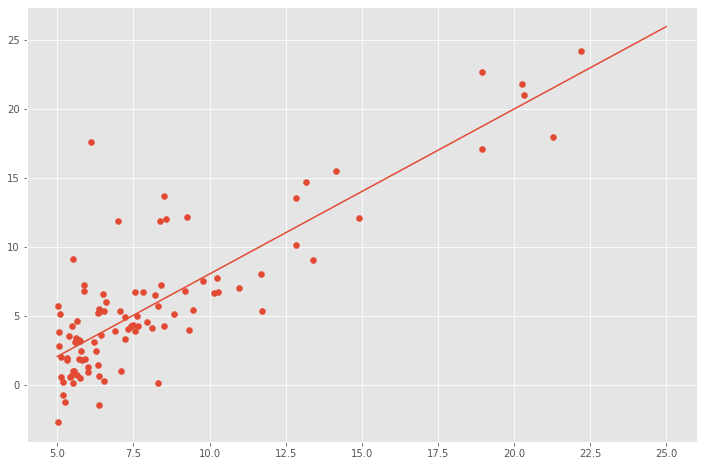

In [75]:
model = make_pipeline(PolynomialFeatures(1),
LinearRegression())
model.fit(X[:, np.newaxis],y) #X[:, np.newaxis] add bias into the tensor
xfit = np.linspace(5, 25, 1000)
yfit = model.predict(xfit[:, np.newaxis])
plt.scatter(X, y)
plt.plot(xfit, yfit);